In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from data_loader import load, _load
import matplotlib.pyplot as plt

In [2]:
#X_train, y_train: use for training and validating
#stratify_criterion: used to make sure each fold in cross validation has the same annotator agreement distribution
#X_test, y_test: only use for estimating final performance, prof really emphasized this (weird kink but ok)
X_train, y_train, stratify_criterion, X_test, y_test = load()

print(X_train.shape, y_train.shape, stratify_criterion.shape, X_test.shape, y_test.shape)

(96000, 548) (96000,) (96000,) (24000, 548) (24000,)


In [3]:
skf = StratifiedKFold(5)
for i, (train_index, validate_index) in enumerate(skf.split(X_train, stratify_criterion)):
    X_fold = X_train[train_index]
    y_fold = y_train[train_index]
    X_validate = X_train[validate_index]
    y_validate = y_train[validate_index]

    #train with X_fold and y_fold, compute perforamnce metric with X_validate and y_validate

#estimate actual performance on best classifier with X_test and y_test


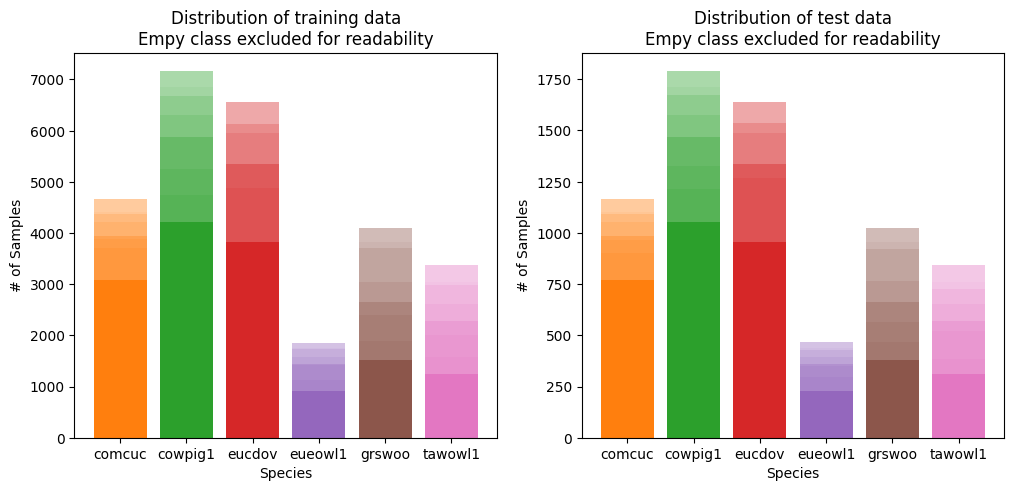

In [4]:
#visualization of class distributions (less transparency = more annotator agreement)

_, y_train, __, ___, y_test, a_train, a_test = _load()
classes = ['empty', 'comcuc', 'cowpig1', 'eucdov', 'eueowl1', 'grswoo', 'tawowl1']

f, ax = plt.subplots(1, 2, figsize=(12,5))
for i, (y, a, t) in enumerate([(y_train, a_train, 'training'), (y_test, a_test, 'test')]):
    ax[i].set_title(f'Distribution of {t} data\nEmpy class excluded for readability')
    ax[i].set_xlabel('Species')
    ax[i].set_ylabel('# of Samples')
    for clazz in np.unique(y):
        if clazz == 0:
            continue
        agreement = a[y == clazz]
        agreement, counts = np.unique(agreement, return_counts=True)
        bottom = 0
        for ag, c, in zip(agreement[::-1], counts[::-1]):
            ax[i].bar(classes[clazz], c, bottom=bottom, color=f'C{clazz}', alpha=np.interp(ag, (0.5, 1), (0.3, 1)))
            bottom += c